In [122]:
#Observable trends
#The "Southern Hemisphere - Wind Speed (mph) vs. Latitude" and "Northern Hemisphere - Wind Speed (mph) vs. Latitude" linear regression equations have the two slopes that are the closest to 0 (0.07 & -0.09 respectively). This indicates that there is almost no impact of latitude on the wind speed that is recorded in a city.
#It is interesting to visually inspect and compare the "City Latitude vs. Cloudiness" scatterplot and the "City Latitude vs. Wind Speed" scatterplot. It is safe to assume that latitude has little impact on these two variables. However, they behave differently. Cloudiness values are all over the place, with no discernable trend. However, it seems that there is a threshold for wind speed: Most cities have wind speeds below 15 mph with only a few of them going above this value. 
#The Northern Hemisphere - Temperature (F) vs.Latitude" linear regression analysis provides overwhelming proof that latitude has an impact on the temperature for those cities in the northern hemisphere of the world. The slope value of the linear regression equation is -1, which means that it is almost certain that temperatures will decrease the further in the north a city is located. 

In [1]:
#Importing dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#API Key
API_key = "6726ced767ce0919b0ef1ea275fbfc29"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#We want to ensure that we get cities from around the world, not just 1 region. As we are working with latitude and longitude, we divide the world
#we divide the world in four quadrants:


#QUADRANT 1 - Southwest quadrant 
# We create a set of random lat and lng combinations. We adjust the low and high values of the latitude and longitude to encompass
#ONLY quadrant #1:
lats = np.random.uniform(low=-90.000, high=0.000, size=600)
lngs = np.random.uniform(low=-180.000, high=0.000, size=600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
#QUADRANT 2 - Northwest quadrant 
# We create a set of random lat and lng combinations. We adjust the low and high values of the latitude and longitude to encompass
#ONLY quadrant #2:

lats = np.random.uniform(low=0.000, high=90.000, size=600)
lngs = np.random.uniform(low=-180.000, high=0.000, size=600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#QUADRANT 3 - Northwest quadrant 
# We create a set of random lat and lng combinations. We adjust the low and high values of the latitude and longitude to encompass
#ONLY quadrant #3:        
        
lats = np.random.uniform(low=0.000, high=90.000, size=600)
lngs = np.random.uniform(low=0.000, high=180.000, size=600)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

lats = np.random.uniform(low=-90.000, high=0.000, size=600)
lngs = np.random.uniform(low=-0.000, high=180.000, size=600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities

891

In [5]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={API_key}&q="

In [6]:
#url1 = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={API_key}&q=dikson"
# set up lists to hold reponse info
cities1 = []
cloudiness = []
countries = []
dates = []
humidity = []
lats = []
lng = []
max_temp = []
speed_w = []
counter = 50
record_counter = 1
set_counter = 1 

print("Beginning data retreival" + "\n" + "----------------------------" + "\n")

# Loop through the list of cities and perform a request for data on each
for x in cities:
    if len(cities1) <= counter: 
        try:
            response = requests.get(url + x).json()
            cities1.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            countries.append(response["sys"]["country"])
            dates.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            lats.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            speed_w.append(response["wind"]["speed"])
            print(f"Processing record {record_counter} of set {set_counter} | {x}")
            record_counter = record_counter+1      
    
        except:
            print("City not found. Skipping....")      
            pass
    else:
        time.sleep(3)
        
        try:
            record_counter = 1
            set_counter = set_counter + 1      
            response = requests.get(url + x).json()
            cities1.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            countries.append(response["sys"]["country"])
            dates.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            lats.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            speed_w.append(response["wind"]["speed"])
            print(f"Processing record {record_counter} of set {set_counter} | {x}")
            record_counter = record_counter + 1      
    
        except:
            print("City not found. Skipping....")      
            pass
        
        counter = counter + 50
        

Beginning data retreival
----------------------------

Processing record 1 of set 1 | punta arenas
Processing record 2 of set 1 | arraial do cabo
Processing record 3 of set 1 | jamestown
Processing record 4 of set 1 | avarua
Processing record 5 of set 1 | cabrobo
Processing record 6 of set 1 | castro
Processing record 7 of set 1 | rikitea
Processing record 8 of set 1 | viedma
Processing record 9 of set 1 | hermanus
Processing record 10 of set 1 | mataura
Processing record 11 of set 1 | sao geraldo do araguaia
Processing record 12 of set 1 | sao jose da coroa grande
Processing record 13 of set 1 | vaini
Processing record 14 of set 1 | caravelas
City not found. Skipping....
Processing record 15 of set 1 | puerto quijarro
Processing record 16 of set 1 | ushuaia
Processing record 17 of set 1 | lebu
Processing record 18 of set 1 | san patricio
Processing record 19 of set 1 | atuona
Processing record 20 of set 1 | mar del plata
Processing record 21 of set 1 | pisco
Processing record 22 of se

Processing record 35 of set 4 | kenora
Processing record 36 of set 4 | ribeira brava
Processing record 37 of set 4 | saint andrews
Processing record 38 of set 4 | half moon bay
Processing record 39 of set 4 | sinnamary
City not found. Skipping....
Processing record 40 of set 4 | abbotsford
Processing record 41 of set 4 | banamba
Processing record 42 of set 4 | dalvik
Processing record 43 of set 4 | iqaluit
Processing record 44 of set 4 | siguiri
Processing record 45 of set 4 | acarau
Processing record 46 of set 4 | goderich
Processing record 47 of set 4 | inuvik
Processing record 48 of set 4 | bonthe
Processing record 49 of set 4 | yucca valley
Processing record 50 of set 4 | vila franca do campo
Processing record 1 of set 5 | miguel hidalgo
Processing record 2 of set 5 | intipuca
Processing record 3 of set 5 | elko
Processing record 4 of set 5 | guarda
Processing record 5 of set 5 | great falls
Processing record 6 of set 5 | constitucion
Processing record 7 of set 5 | saint anthony
Pr

Processing record 23 of set 8 | vanimo
Processing record 24 of set 8 | hirara
Processing record 25 of set 8 | yushala
Processing record 26 of set 8 | riyadh
Processing record 27 of set 8 | ubinskoye
Processing record 28 of set 8 | barwadih
Processing record 29 of set 8 | balykshi
Processing record 30 of set 8 | leningradskiy
Processing record 31 of set 8 | bara
Processing record 32 of set 8 | kutum
Processing record 33 of set 8 | vostok
Processing record 34 of set 8 | gravdal
Processing record 35 of set 8 | muli
Processing record 36 of set 8 | moyale
Processing record 37 of set 8 | dolzhanskaya
Processing record 38 of set 8 | robe
Processing record 39 of set 8 | mizdah
City not found. Skipping....
Processing record 40 of set 8 | parabel
Processing record 41 of set 8 | mizan teferi
Processing record 42 of set 8 | mehamn
Processing record 43 of set 8 | tashla
Processing record 44 of set 8 | ouango
Processing record 45 of set 8 | zhuanghe
Processing record 46 of set 8 | nishihara
City not

City not found. Skipping....
City not found. Skipping....
Processing record 8 of set 12 | svetlyy
Processing record 9 of set 12 | boddam
Processing record 10 of set 12 | panzhihua
Processing record 11 of set 12 | krasnoarmeysk
Processing record 12 of set 12 | chynov
Processing record 13 of set 12 | beba
Processing record 14 of set 12 | visnes
City not found. Skipping....
Processing record 15 of set 12 | kavaratti
City not found. Skipping....
Processing record 16 of set 12 | dukat
Processing record 17 of set 12 | kharitonovo
Processing record 18 of set 12 | semporna
Processing record 19 of set 12 | kaseda
Processing record 20 of set 12 | tuni
Processing record 21 of set 12 | pustoshka
Processing record 22 of set 12 | chalus
Processing record 23 of set 12 | funadhoo
Processing record 24 of set 12 | bandarbeyla
Processing record 25 of set 12 | tchollire
Processing record 26 of set 12 | miyazu
Processing record 27 of set 12 | yanam
Processing record 28 of set 12 | victoria
Processing recor

City not found. Skipping....
Processing record 43 of set 15 | mbala
Processing record 44 of set 15 | innisfail
Processing record 45 of set 15 | kaeo
Processing record 46 of set 15 | portland
Processing record 47 of set 15 | madang
Processing record 48 of set 15 | sokoni
City not found. Skipping....
Processing record 49 of set 15 | port hedland
Processing record 50 of set 15 | karratha
Processing record 1 of set 16 | nelson bay
Processing record 2 of set 16 | kalakamati
Processing record 3 of set 16 | tual
City not found. Skipping....
Processing record 4 of set 16 | byumba
Processing record 5 of set 16 | lakatoro
Processing record 6 of set 16 | lata
Processing record 7 of set 16 | thamaga
Processing record 8 of set 16 | waingapu
Processing record 9 of set 16 | brazzaville
Processing record 10 of set 16 | poum
Processing record 11 of set 16 | isangel
Processing record 12 of set 16 | labuhan
Processing record 13 of set 16 | saldanha
Processing record 14 of set 16 | sefophe
Processing reco

In [65]:
#Convert Raw Data to DataFrame
  #Export the city data into a .csv.
  #Display the DataFrame

In [7]:
#We indicate the number of values that each list has, as requested:
print(len(cities1))
print(len(cloudiness))
print(len(countries))
print(len(dates))
print(len(humidity))
print(len(lats))
print(len(lng))
print(len(max_temp))
print(len(speed_w))

819
819
819
819
819
819
819
819
819


In [68]:
#We build a dictionary, and then a dataframe based on the lists that we created.
dataframe = {"City":cities1, "Cloudiness":cloudiness, "Country":countries, "Date":dates, "Humidity":humidity, "Lat":lats, "Lng":lng, "Max Temp":max_temp, "Wind Speed": speed_w}
dataframe = pd.DataFrame(dataframe)
dataframe.to_csv("1.dataframe.csv", index = False , header = True)
dataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1604717233,61,-53.15,-70.92,48.20,8.05
1,Arraial do Cabo,98,BR,1604717485,74,-22.97,-42.03,70.97,7.63
2,Jamestown,1,US,1604717210,54,42.10,-79.24,55.40,8.05
3,Avarua,82,CK,1604717456,83,-21.21,-159.78,77.00,4.70
4,Cabrobó,90,BR,1604717896,65,-8.51,-39.31,79.21,21.54
...,...,...,...,...,...,...,...,...,...
814,Chitipa,23,MW,1604718184,70,-9.70,33.27,63.82,5.84
815,Ondjiva,0,AO,1604718184,31,-17.07,15.73,69.84,6.76
816,Chitungwiza,0,ZW,1604718185,53,-18.01,31.08,69.01,5.01
817,Mwinilunga,43,ZM,1604718185,85,-11.74,24.43,62.04,1.61


In [9]:
# Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs. 

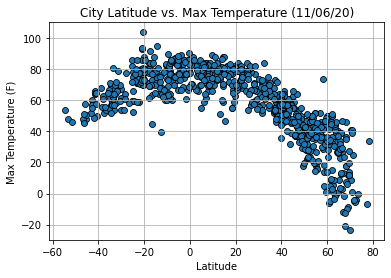

In [95]:
#City Latitude vs. Max Temperature 
#We create the scatter plot and add the necessary labels & formatting changes: 

plt.scatter(dataframe["Lat"],dataframe["Max Temp"],edgecolors="black",linewidth=0.8)
plt.title("City Latitude vs. Max Temperature (11/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("2.Lat_vs_Temp.png")
plt.show()

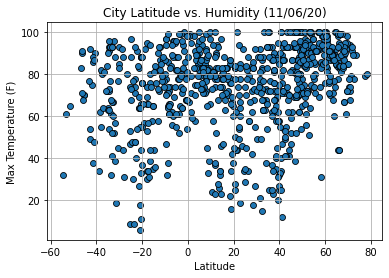

In [94]:
#City Latitude vs. Humidity 
#We create the scatter plot and add the necessary labels & formatting changes: 

plt.scatter(dataframe["Lat"],dataframe["Humidity"],edgecolors="black",linewidth=0.8)
plt.title("City Latitude vs. Humidity (11/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("3.Lat_vs_Humidity.png")
plt.show()

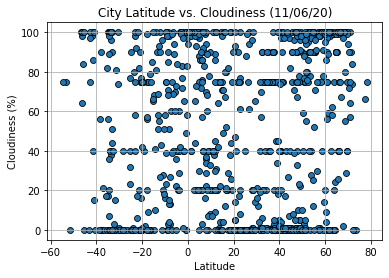

In [93]:
#City Latitude vs. Cloudiness 
#We create the scatter plot and add the necessary labels & formatting changes: 

plt.scatter(dataframe["Lat"],dataframe["Cloudiness"],edgecolors="black",linewidth=0.8)
plt.title("City Latitude vs. Cloudiness (11/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("4.Lat_vs_Cloudiness.png")
plt.show()

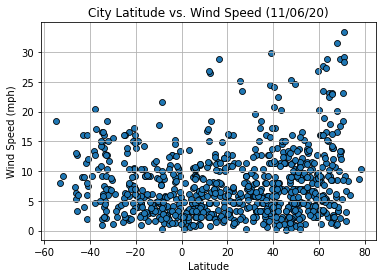

In [92]:
#City Latitude vs. Wind Speed 
#We create the scatter plot and add the necessary labels & formatting changes: 

plt.scatter(dataframe["Lat"],dataframe["Wind Speed"],edgecolors="black",linewidth=0.8)
plt.title("City Latitude vs. Wind Speed (11/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("5.Lat_vs_WindSpeed.png")
plt.show()

In [96]:
#LINEAR REGRESSION CHARTS
#We create two dataframs. One with the cities above the equator line (northern hemisphere), and one with cities below the equator line (southern hemisphere)

Northern_Hemisphere = dataframe.loc[dataframe["Lat"]>0]
Southern_Hemisphere = dataframe.loc[dataframe["Lat"]<0]

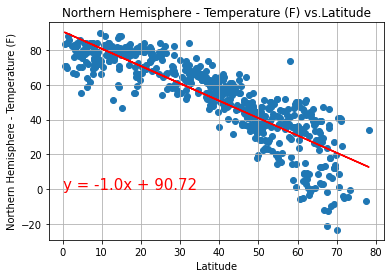

In [101]:
#We import scipy.stats
from scipy.stats import linregress

#LINEAR REGRESSION #1 - Northern Hemisphere - Temperature (F) vs.Latitude

#We calculate the correlation coefficient, and  the regression values:
slope, intercept, rvalue, pvalue, stderr = linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Max Temp"])
x_values = Northern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Northern_Hemisphere["Max Temp"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(0, 0), fontsize=15, color='red')
plt.ylabel("Northern Hemisphere - Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Northern Hemisphere - Temperature (F) vs.Latitude")
plt.savefig("6.North_Temp_vs_Lat.png")
plt.show()

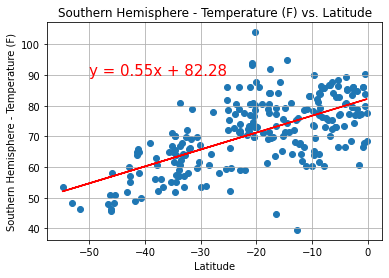

In [105]:
#LINEAR REGRESSION #2 - Southern Hemisphere - Temperature (F) vs. Latitude

#We calculate the correlation coefficient, and  the regress values:
slope, intercept, rvalue, pvalue, stderr = linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Max Temp"])
x_values = Southern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Southern_Hemisphere["Max Temp"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(-50, 90), fontsize=15, color='red')
plt.ylabel("Southern Hemisphere - Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.savefig("7.South_Temp_vs_Lat.png")
plt.show()

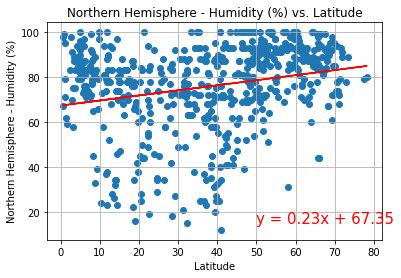

In [107]:
#LINEAR REGRESSION #3 - Northern Hemisphere - Humidity (%) vs. Latitude

#We calculate the correlation coefficient, and  the regress values:
slope, intercept, rvalue, pvalue, stderr = linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Humidity"])
x_values = Northern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Northern_Hemisphere["Humidity"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(50, 15), fontsize=15, color='red')
plt.ylabel("Northern Hemisphere - Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.savefig("8.North_Humidity_vs_Lat.png")
plt.show()

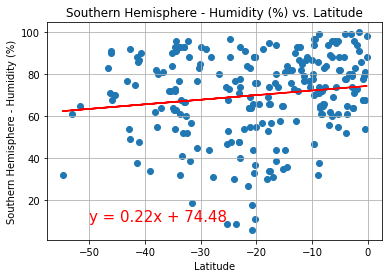

In [110]:
#LINEAR REGRESSION #4 - Southern Hemisphere - Humidity (%) vs. Latitude

#We calculate the correlation coefficient, and  the regress values:
slope, intercept, rvalue, pvalue, stderr = linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Humidity"])
x_values = Southern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Southern_Hemisphere["Humidity"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(-50, 10), fontsize=15, color='red')
plt.ylabel("Southern Hemisphere - Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.savefig("9.South_Humidity_vs_Lat.png")
plt.show()

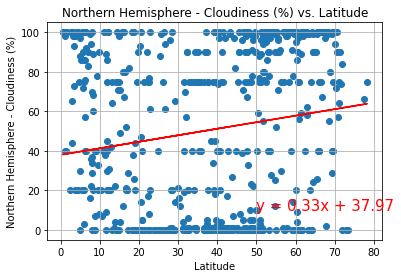

In [112]:
#LINEAR REGRESSION #5 - Northern Hemisphere - Cloudiness (%) vs. Latitude

#We calculate the correlation coefficient, and  the regress values:
slope, intercept, rvalue, pvalue, stderr = linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Cloudiness"])
x_values = Northern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Northern_Hemisphere["Cloudiness"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(50, 10), fontsize=15, color='red')
plt.ylabel("Northern Hemisphere - Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.savefig("10.North_Cloudiness_vs_Lat.png")
plt.show()

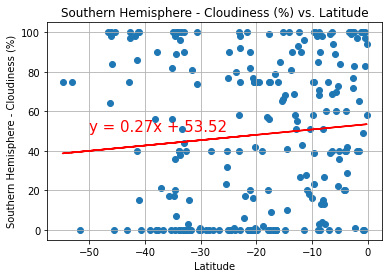

In [114]:
#LINEAR REGRESSION #6 - Southern Hemisphere - Cloudiness (%) vs. Latitude

#We calculate the correlation coefficient, and  the regress values:
slope, intercept, rvalue, pvalue, stderr = linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Cloudiness"])
x_values = Southern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Southern_Hemisphere["Cloudiness"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(-50, 50), fontsize=15, color='red')
plt.ylabel("Southern Hemisphere - Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.savefig("11.South_Cloudiness_vs_Lat.png")
plt.show()

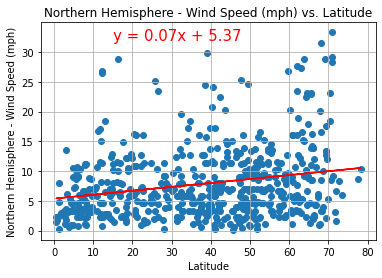

In [119]:
#LINEAR REGRESSION #7 - Northern Hemisphere - Wind Speed (mph) vs. Latitude

#We calculate the correlation coefficient, and  the regress values:
slope, intercept, rvalue, pvalue, stderr = linregress(Northern_Hemisphere["Lat"], Northern_Hemisphere["Wind Speed"])
x_values = Northern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Northern_Hemisphere["Wind Speed"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(15, 32), fontsize=15, color='red')
plt.ylabel("Northern Hemisphere - Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.savefig("12.North_WindSpeed_vs_Lat.png")
plt.show()

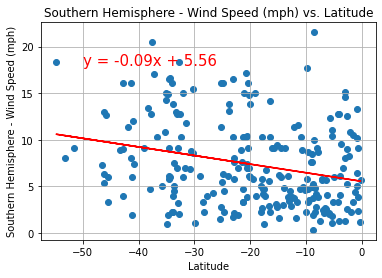

In [121]:
#LINEAR REGRESSION #8 - Southern Hemisphere - Wind Speed (mph) vs. Latitude

#We calculate the correlation coefficient, and  the regress values:
slope, intercept, rvalue, pvalue, stderr = linregress(Southern_Hemisphere["Lat"], Southern_Hemisphere["Wind Speed"])
x_values = Southern_Hemisphere["Lat"]
regress_values = slope * x_values + intercept 

#We write down the equation
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#We draft the linear regression model: 
plt.scatter(x_values, Southern_Hemisphere["Wind Speed"])
plt.plot(x_values, regress_values, color="red")
plt.annotate(eq,(-50, 18), fontsize=15, color='red')
plt.ylabel("Southern Hemisphere - Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.savefig("13.South_WindSpeed_vs_Lat.png")
plt.show()